In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import pandas as pd 

In [ ]:
%matplotlib inline

In [ ]:
import csv

In [ ]:
from github import Github

# collect data 

In [ ]:
User = "username"
Password = "Password"
g = Github(User, Password)

In [ ]:
user = g.get_user(User) 

In [ ]:
user.get_following()[1].name
user.get_following()[1].id 
user.get_following()[1].login

In [ ]:
[i.login for i in user.get_following()]

In [ ]:
jobovy = g.get_user('jobovy')
#jobovy.raw_data
jobovy.company
jobovy.bio
jobovy.location
jobovy.blog

In [ ]:
for i in user.get_following():
    print("{} is following {}".format(user.name, i.name)) 
    for j in g.get_user(i.login).get_following():
        print("{} is following {}".format(i.name, j.name))        

In [ ]:
with open('github.csv', 'w') as f:
    f = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    f.writerow(['ID', 'name', 'location', 'company', 'bio', 'blog'])
    
    ID = set()
    for i in user.get_following():
        f.writerow([i.login, i.name, i.location, i.company, i.bio, i.blog])
        ID.add(i.login)
        for j in g.get_user(i.login).get_following():
            if j.login in ID:
                continue
            f.writerow([j.login, j.name, j.location, j.company, j.bio, j.blog])
            for k in g.get_user(j.login).get_following():
                if k.login in ID:
                    continue
                f.writerow([k.login, k.name, k.location, k.company, k.bio, k.blog])

In [ ]:
g.get_user

In [ ]:
repo_c_training = user.get_repos()[1]

In [ ]:
repo_c_training.created_at
repo_c_training.get_commits()[1]
repo_c_training.get_commit
repo_c_training.get_commits
repo_c_training.stargazers_count

In [ ]:
all_commits_of_c = repo_c_training.get_commits()

In [ ]:
comits = repo_c_training.get_commits()[1]
comits.raw_data['commit']['committer']['date']
comits.raw_data['commit']

In [ ]:
%timeit all_date_of_commits_of_c = [i.raw_data['commit']['committer']['date'] for i in all_commits_of_c]

In [ ]:
sample = all_date_of_commits_of_c[0]

In [ ]:
all_commits_date = [
    datetime.datetime.strftime(
        datetime.datetime.strptime(i, "%Y-%m-%dT%H:%M:%SZ"),
        '%Y-%m-%d %H:%M:%S') for i in all_date_of_commits_of_c
]

# save data 

In [ ]:
with open('data/c_commits.txt', 'w') as f:
    for i in all_commits_date:
        f.writelines(i)
        f.writelines('\n')

In [ ]:
with open('data/c_commits.txt', 'r') as f:
    data = f.readlines()
    
data = [i.replace('\n', '') for i in data]

# data visualization

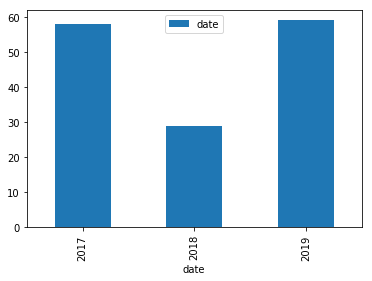

In [7]:
df  = pd.DataFrame({'date' : data})
df["date"] = df["date"].astype("datetime64")
_ = df.groupby(df["date"].dt.year).count().plot(kind="bar")

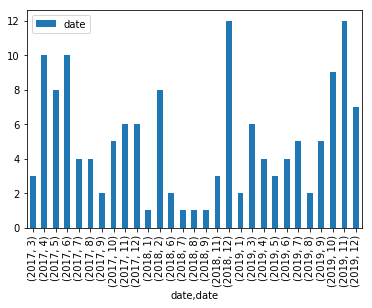

In [8]:
_ = df.groupby([df["date"].dt.year, df["date"].dt.month]).count().plot(kind="bar")

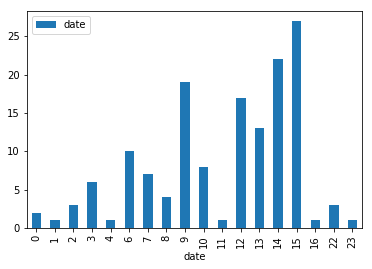

In [9]:
_ = df.groupby(df["date"].dt.hour).count().plot(kind="bar")

<span style="font-family:New York Times; color: red">
datetime format in data  is `ISO-8601` date representation. I'm in Beijing (UTC+08:00)
</span>

In [ ]:
repo_Python_training = user.get_repos()[5]
all_commits_of_Python = repo_Python_training.get_commits()
all_date_of_commits_of_Python = [
    i.raw_data['commit']['committer']['date'] for i in all_commits_of_Python
]
df = pd.DataFrame({'date': all_date_of_commits_of_Python})
df["date"] = df["date"].astype("datetime64")
_ = df.groupby([df["date"].dt.year,
                df["date"].dt.month]).count().plot(kind="bar")